In [1]:
import pandas as pd

# Load CSV from folder
# df = pd.read_csv("styles.csv", on_bad_lines='skip')
df = pd.read_csv(r"C:\Users\nikhi\OneDrive\Documents\DATA SCIENCE\ASSIGNMENT\fashion_multilabel_classifier\data\styles.csv", on_bad_lines='skip')

print("Shape:", df.shape)


Shape: (44424, 10)


In [2]:
print(df.head())


      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [3]:
print(df.isnull().sum())


id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64


In [4]:
import matplotlib.pyplot as plt


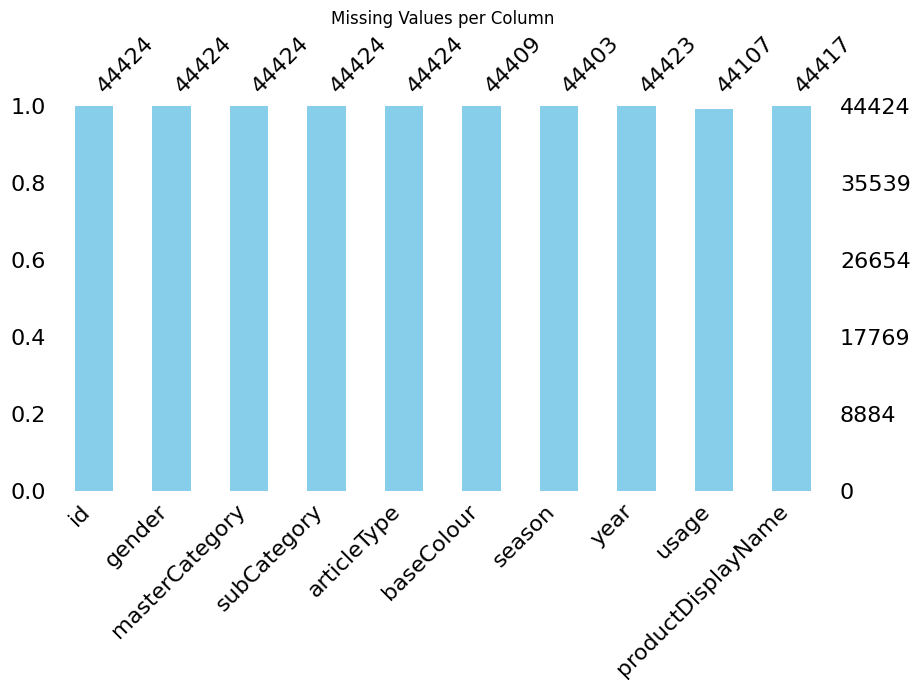

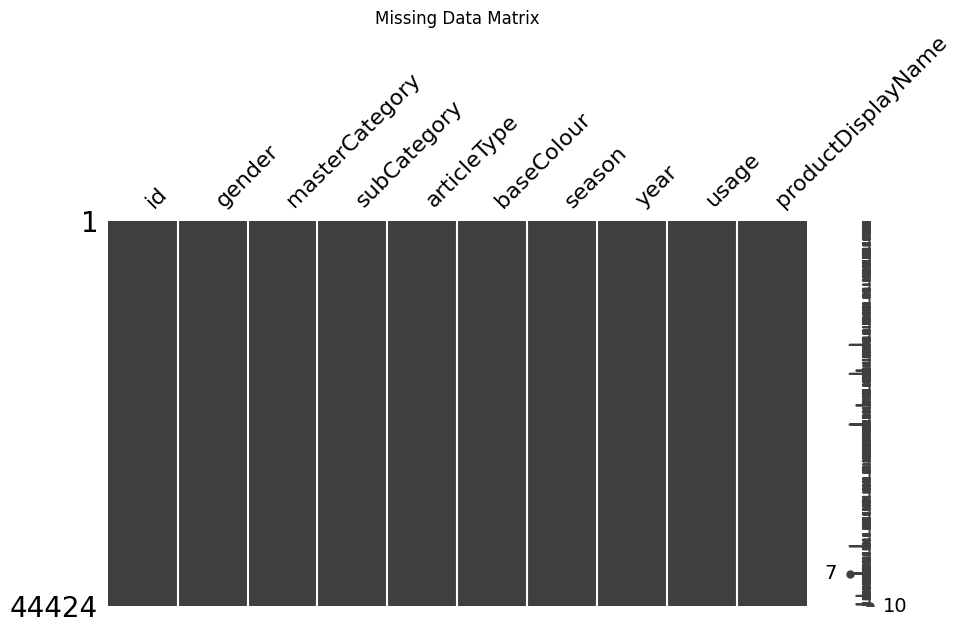

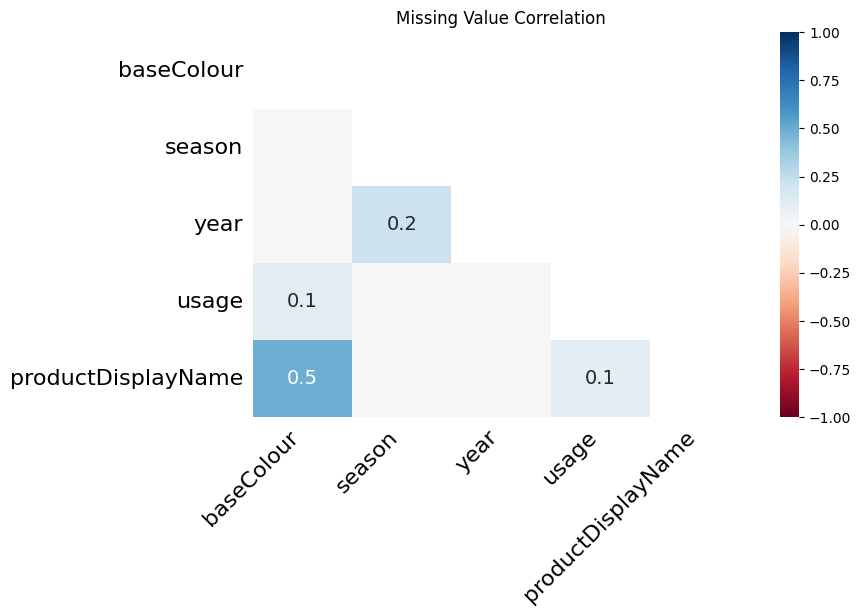

In [5]:
import missingno as msno

# Bar chart: how much is missing in each column
msno.bar(df, figsize=(10, 5), color="skyblue")
plt.title("Missing Values per Column")
plt.show()

# Matrix view: shows structure of missing data
msno.matrix(df, figsize=(10, 5))
plt.title("Missing Data Matrix")
plt.show()

# Heatmap view: correlation of missingness (optional)
msno.heatmap(df, figsize=(8, 5))
plt.title("Missing Value Correlation")
plt.show()


In [6]:
# Drop rows where productDisplayName is missing
df.dropna(subset=['productDisplayName'], inplace=True)

# Fill missing categorical values with "unknown"
df['baseColour'].fillna('unknown', inplace=True)
df['season'].fillna('unknown', inplace=True)
df['usage'].fillna('unknown', inplace=True)

# Fill missing year with the most frequent year
df['year'].fillna(df['year'].mode()[0], inplace=True)

# Convert year to integer
df['year'] = df['year'].astype(int)


In [7]:
print(df.isnull().sum())

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64


In [8]:
df.drop_duplicates(inplace=True)


In [9]:
print(df.dtypes)


id                     int64
gender                object
masterCategory        object
subCategory           object
articleType           object
baseColour            object
season                object
year                   int32
usage                 object
productDisplayName    object
dtype: object


In [10]:
print(df['gender'].value_counts())

gender
Men       22144
Women     18627
Unisex     2161
Boys        830
Girls       655
Name: count, dtype: int64


In [11]:
print(df['masterCategory'].value_counts())

masterCategory
Apparel           21397
Accessories       11272
Footwear           9219
Personal Care      2398
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64


In [12]:
print(df['year'].value_counts().sort_index())

year
2007        2
2008        7
2009       20
2010      846
2011    13672
2012    16287
2013     1212
2014      236
2015     2780
2016     6006
2017     2911
2018      405
2019       33
Name: count, dtype: int64


In [13]:
# Clean productDisplayName: strip spaces and convert to lowercase
df['productDisplayName'] = df['productDisplayName'].astype(str).str.strip().str.lower()

# Fix common typos (optional — example shown)
# Example: replace "t-shrt" or "tshrt" with "t-shirt"
df['productDisplayName'] = df['productDisplayName'].str.replace(r'\bt[-\s]?shrt\b', 't-shirt', regex=True)

# Clean year: fill missing (if not already), then convert to int
df['year'].fillna(df['year'].mode()[0], inplace=True)
df['year'] = df['year'].astype(int)


In [14]:
df.describe(include='all')


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
count,44417.000000,44417,44417,44417,44417,44417,44417,44417.000000,44417,44417
unique,NaN,5,7,45,143,47,5,NaN,9,30993
top,NaN,Men,Apparel,Topwear,Tshirts,Black,Summer,NaN,Casual,lucera women silver earrings
freq,NaN,22144,21397,15402,7067,9728,21470,NaN,34404,82
mean,29694.660310,NaN,NaN,NaN,NaN,NaN,NaN,2012.806043,NaN,NaN
std,17050.145672,NaN,NaN,NaN,NaN,NaN,NaN,2.126155,NaN,NaN
min,1163.000000,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN
25%,14767.000000,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN
50%,28615.000000,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN
75%,44683.000000,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN


C:\Users\nikhi\AppData\Local\Temp\ipykernel_3608\266187304.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='Set2')


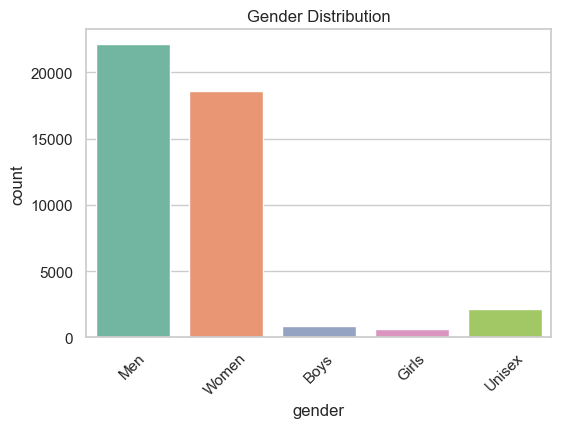

C:\Users\nikhi\AppData\Local\Temp\ipykernel_3608\266187304.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='masterCategory', palette='Set3')


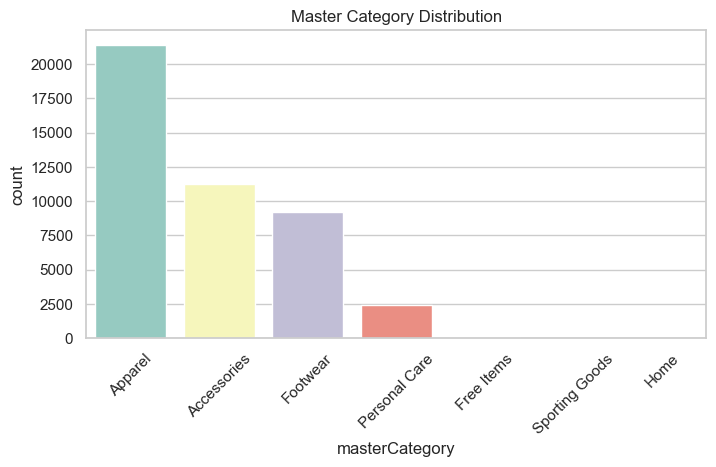

C:\Users\nikhi\AppData\Local\Temp\ipykernel_3608\266187304.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette='coolwarm')


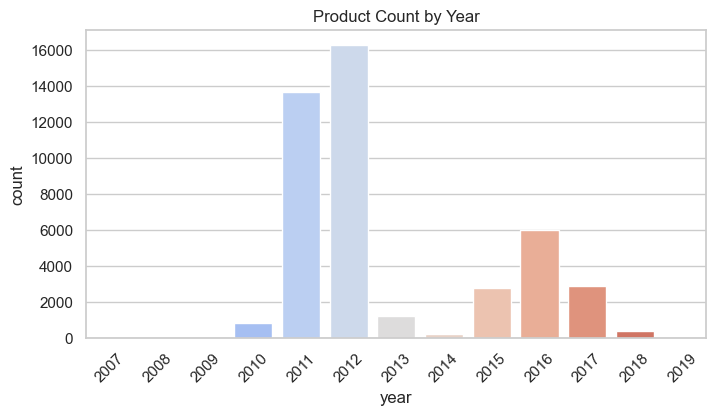

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a consistent style
sns.set(style="whitegrid")

# Plot for Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='Set2')
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.show()

# Plot for MasterCategory
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='masterCategory', palette='Set3')
plt.title('Master Category Distribution')
plt.xticks(rotation=45)
plt.show()

# Plot for Year
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='year', palette='coolwarm')
plt.title('Product Count by Year')
plt.xticks(rotation=45)
plt.show()


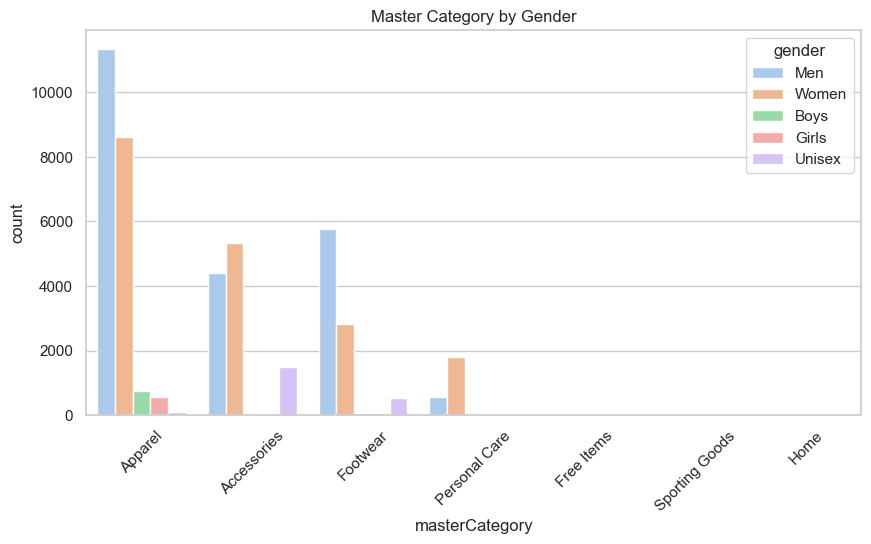

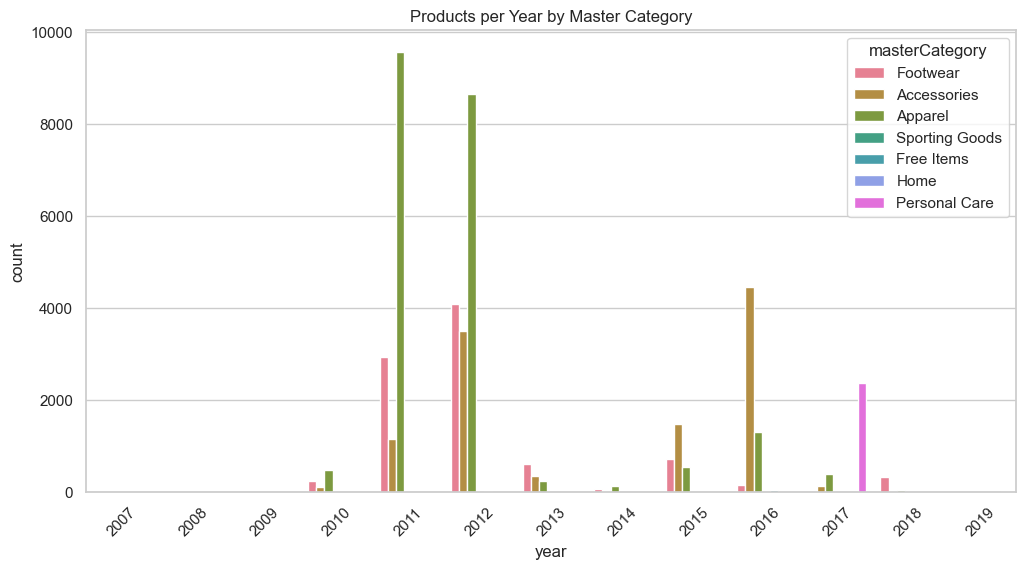

In [16]:
# Gender vs MasterCategory
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='masterCategory', hue='gender', palette='pastel')
plt.title('Master Category by Gender')
plt.xticks(rotation=45)
plt.show()

# Year vs MasterCategory
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year', hue='masterCategory', palette='husl')
plt.title('Products per Year by Master Category')
plt.xticks(rotation=45)
plt.show()


In [17]:
# Count unique values in each column
df.nunique()


id                    44417
gender                    5
masterCategory            7
subCategory              45
articleType             143
baseColour               47
season                    5
year                     13
usage                     9
productDisplayName    30993
dtype: int64

In [18]:
# Identify high-cardinality columns (for encoding decisions)
high_cardinality_cols = [col for col in df.select_dtypes(include='object') if df[col].nunique() > 50]
print("High-cardinality categorical columns:", high_cardinality_cols)



High-cardinality categorical columns: ['articleType', 'productDisplayName']


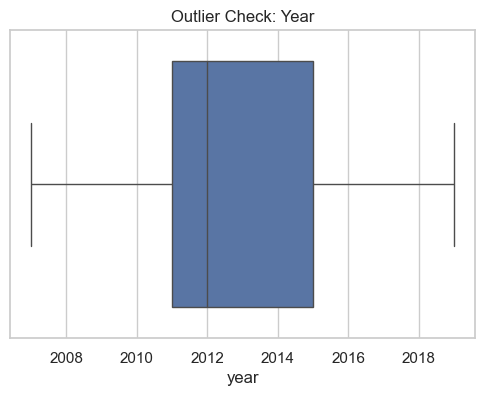

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for year (assuming more numeric features are added later)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['year'])
plt.title('Outlier Check: Year')
plt.show()


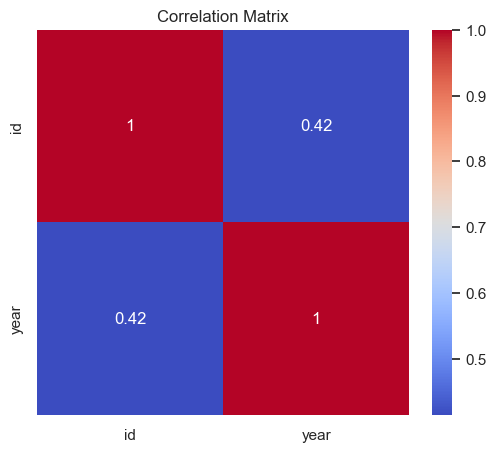

In [20]:
# Only numeric columns are used for correlation
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [21]:
# Summary: Categorical columns and their cardinality
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")


gender: 5 unique values
masterCategory: 7 unique values
subCategory: 45 unique values
articleType: 143 unique values
baseColour: 47 unique values
season: 5 unique values
usage: 9 unique values
productDisplayName: 30993 unique values


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 44417, number of used features: 9
[LightGBM] [Info] Start training from score -6.126667
[LightGBM] [Info] Start training from score -7.928789
[LightGBM] [Info] Start training from score -4.116586
[LightGBM] [Info] Start training from score -6.258726
[LightGBM] [Info] Start training from score -8.136428
[LightGBM] [Info] Start training from score -7.705645
[LightGBM] [Info] Start training from score -9.315083
[LightGBM] [Info] Start training from score -4.000646
[LightGBM] [Info] Start training from score -8.621936
[LightGBM] [Info] Start training from score -8.909618
[LightGBM] [Info] Start training from score -10.701378
[LightGBM] [Info] Start training from score -8.216471


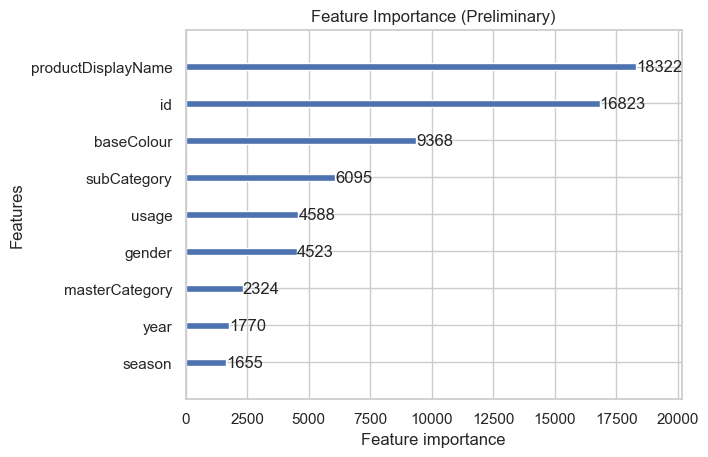

In [ ]:
# import lightgbm as lgb
# from sklearn.preprocessing import LabelEncoder

# # Drop NA and make a quick encode for demonstration
# df_model = df.dropna()
# le = LabelEncoder()

# for col in cat_cols:
#     df_model[col] = le.fit_transform(df_model[col])

# X = df_model.drop('articleType', axis=1)  # Replace with your target
# y = df_model['articleType']

# lgb_model = lgb.LGBMClassifier()
# lgb_model.fit(X, y)

# # Plot importance
# lgb.plot_importance(lgb_model, max_num_features=10)
# plt.title("Feature Importance (Preliminary)")
# plt.show()


In [13]:
import os
import pandas as pd
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Set correct paths
data_dir = r"C:\Users\nikhi\OneDrive\Documents\DATA SCIENCE\ASSIGNMENT\fashion_multilabel_classifier\data"
image_dir = os.path.join(data_dir, "images")

# Load styles CSV
styles = pd.read_csv(os.path.join(data_dir, "styles.csv"), on_bad_lines='skip')
styles = styles.dropna(subset=['id', 'gender', 'baseColour', 'season', 'articleType'])

# Only keep images that exist
existing_ids = set(os.listdir(image_dir))
styles['image_path'] = styles['id'].astype(str) + ".jpg"
styles = styles[styles['image_path'].isin(existing_ids)]

# Label encode outputs
encoders = {}
for col in ['gender', 'baseColour', 'season', 'articleType']:
    le = LabelEncoder()
    styles[col + '_enc'] = le.fit_transform(styles[col])
    encoders[col] = le

# Resize and convert images to arrays
def load_image(img_path, size=(128, 128)):
    img = Image.open(img_path).convert("RGB")
    img = img.resize(size)
    return np.array(img)

# FIXED HERE: use full image_dir path
X_images = np.array([
    load_image(os.path.join(image_dir, fname)) for fname in styles['image_path']
])

# Prepare labels
y_gender = to_categorical(styles['gender_enc'])
y_color = to_categorical(styles['baseColour_enc'])
y_season = to_categorical(styles['season_enc'])
y_type = to_categorical(styles['articleType_enc'])


In [29]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model

input_layer = Input(shape=(128, 128, 3))
base_model = MobileNetV2(include_top=False, weights="imagenet", input_tensor=input_layer)
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.3)(x)

# Multiple outputs
out_gender = Dense(y_gender.shape[1], activation='softmax', name='gender')(x)
out_color = Dense(y_color.shape[1], activation='softmax', name='color')(x)
out_season = Dense(y_season.shape[1], activation='softmax', name='season')(x)
out_type = Dense(y_type.shape[1], activation='softmax', name='type')(x)

model = Model(inputs=input_layer, outputs=[out_gender, out_color, out_season, out_type])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()




9406464/9406464 [==============================] - 3s 0us/step

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)          

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_gender_train, y_gender_val, y_color_train, y_color_val, y_season_train, y_season_val, y_type_train, y_type_val = train_test_split(
    X_images, y_gender, y_color, y_season, y_type, test_size=0.2, random_state=42
)

history = model.fit(X_train,
                    [y_gender_train, y_color_train, y_season_train, y_type_train],
                    validation_data=(X_val, [y_gender_val, y_color_val, y_season_val, y_type_val]),
                    epochs=10,
                    batch_size=32)


Epoch 1/10


1110/1110 [==============================] - 769s 643ms/step - loss: 3.9858 - gender_loss: 0.4393 - color_loss: 1.6824 - season_loss: 0.8210 - type_loss: 1.0431 - gender_accuracy: 0.8410 - color_accuracy: 0.5283 - season_accuracy: 0.6483 - type_accuracy: 0.7190 - val_loss: 19.3183 - val_gender_loss: 1.5439 - val_color_loss: 9.7963 - val_season_loss: 2.3080 - val_type_loss: 5.6702 - val_gender_accuracy: 0.7300 - val_color_accuracy: 0.1446 - val_season_accuracy: 0.5139 - val_type_accuracy: 0.3173
Epoch 2/10
1110/1110 [==============================] - 604s 544ms/step - loss: 3.0099 - gender_loss: 0.3265 - color_loss: 1.3266 - season_loss: 0.7142 - type_loss: 0.6427 - gender_accuracy: 0.8834 - color_accuracy: 0.6085 - season_accuracy: 0.7017 - type_accuracy: 0.8040 - val_loss: 13.0160 - val_gender_loss: 1.0487 - val_color_loss: 7.9785 - val_season_loss: 0.9684 - val_type_loss: 3.0205 - val_gender_accuracy: 0.7578 - val_color_accuracy: 0.1695 - val_season_accuracy: 0.6270 - va

In [ ]:
model.save("fashion_multitask_model.h5")


In [13]:
from tensorflow.keras.models import load_model

model = load_model("fashion_multitask_model.h5")


In [14]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
import pickle
from PIL import Image


In [15]:
from sklearn.preprocessing import LabelEncoder

# Load styles.csv again
styles = pd.read_csv("C:/Users/nikhi/OneDrive/Documents/DATA SCIENCE/ASSIGNMENT/fashion_multilabel_classifier/data/styles.csv", on_bad_lines='skip')
styles = styles.dropna(subset=['id', 'gender', 'baseColour', 'season', 'articleType'])

encoders = {}
for col in ['gender', 'baseColour', 'season', 'articleType']:
    le = LabelEncoder()
    styles[col + '_enc'] = le.fit_transform(styles[col])
    encoders[col] = le


In [16]:
def load_image(img_path, size=(128, 128)):
    img = Image.open(img_path).convert("RGB")
    img = img.resize(size)
    return np.array(img)

In [17]:
def predict_from_image(image_path, base_dir="images", size=(128, 128)):
    full_path = os.path.join(base_dir, image_path)

    if not os.path.exists(full_path):
        raise FileNotFoundError(f"Image not found at path: {full_path}")
    
    img = load_image(full_path, size=size)
    img = np.expand_dims(img, axis=0)
    preds = model.predict(img)

    gender_pred = encoders['gender'].inverse_transform([np.argmax(preds[0])])[0]
    color_pred = encoders['baseColour'].inverse_transform([np.argmax(preds[1])])[0]
    season_pred = encoders['season'].inverse_transform([np.argmax(preds[2])])[0]
    type_pred = encoders['articleType'].inverse_transform([np.argmax(preds[3])])[0]

    return {
        "Gender": gender_pred,
        "Color": color_pred,
        "Season": season_pred,
        "Type": type_pred
    }

In [38]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Prediction and display function
def show_prediction(image_name, base_dir="C:/Users/nikhi/OneDrive/Documents/DATA SCIENCE/ASSIGNMENT/fashion_multilabel_classifier/data/test_images"):
    image_path = os.path.join(base_dir, image_name)
    
    # Display image
    img = mpimg.imread(image_path)
    
    # Get prediction (you must have your function defined: predict_from_image)
    prediction = predict_from_image(image_name, base_dir)
    
    # Plot
    plt.figure(figsize=(8, 4))
    
    # Left: Image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Input Image")
    
    # Right: Prediction
    plt.subplot(1, 2, 2)
    plt.axis('off')
    plt.title("Predicted Labels")
    
    # Format prediction nicely
    if isinstance(prediction, list):
        text = "\n".join(prediction)
    else:
        text = str(prediction)
    
    plt.text(0.1, 0.5, text, fontsize=12, wrap=True)
    
    plt.tight_layout()
    plt.show()


1/1 [==============================] - 0s 54ms/step


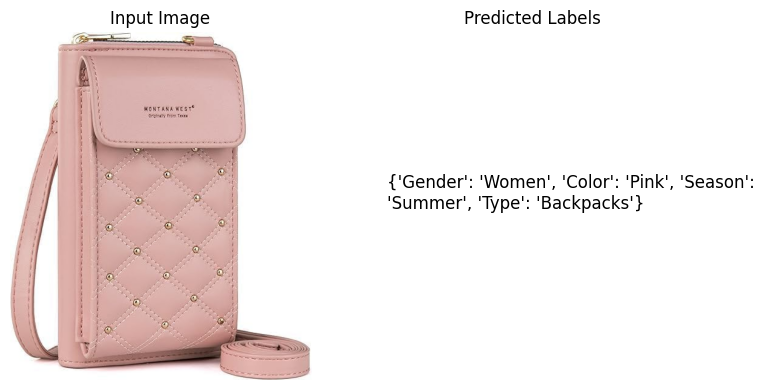

1/1 [==============================] - 0s 48ms/step


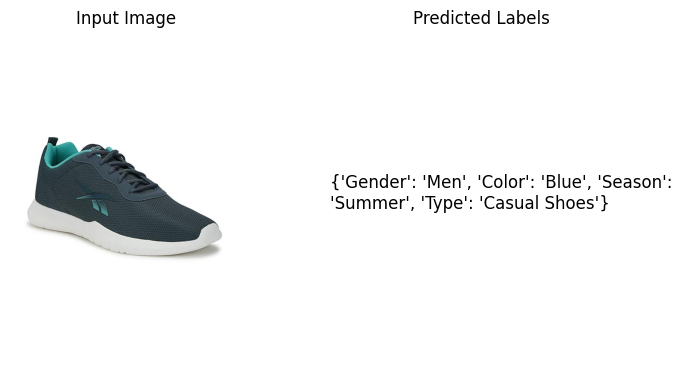

In [43]:
show_prediction("41QeZjXgS-L.jpg")
show_prediction("61CnW8etsXL._SY695_.jpg")

1/1 [==============================] - 0s 172ms/step


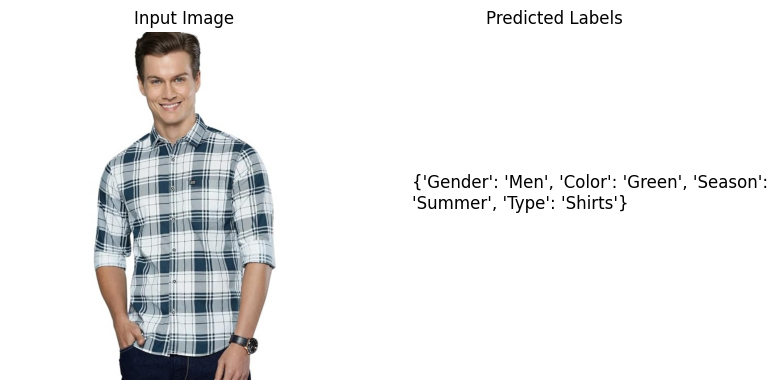

In [47]:
show_prediction("61rG+UIslgL._SX679_.jpg")

In [32]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 64, 64, 32)           0         ['bn_Conv1[0][0]']        